In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
len(x_train)

60000

In [3]:
len(x_test)

10000

In [4]:
x_train[0].shape

(28, 28)

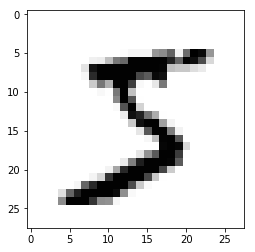

In [5]:
plt.imshow(x_train[0], cmap = 'Greys')

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
x_train_normalize= (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_normalize= (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [11]:
from keras.models import Sequential
model = Sequential()

In [12]:
from keras.layers import Dense,Activation
model.add(Dense(784,input_dim=784))
model.add(Activation("relu"))

model.add(Dense(392))
model.add(Activation("relu"))

model.add(Dense(196))
model.add(Activation("relu"))

model.add(Dense(98))
model.add(Activation("relu"))

model.add(Dense(49))
model.add(Activation("relu"))

model.add(Dense(24))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
from keras import optimizers
Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [14]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer =Adam,
              metrics = ["accuracy"])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 392)               307720    
_________________________________________________________________
activation_2 (Activation)    (None, 392)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 196)               77028     
_________________________________________________________________
activation_3 (Activation)    (None, 196)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 98)                19306     
__________

In [16]:
model_fit=model.fit(x_train_normalize, y_train, batch_size=1200, epochs=10,verbose=2,validation_data=(x_test_normalize, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.7056 - acc: 0.2992 - val_loss: 1.1244 - val_acc: 0.5465
Epoch 2/10
 - 6s - loss: 0.8768 - acc: 0.6631 - val_loss: 0.6619 - val_acc: 0.7555
Epoch 3/10
 - 6s - loss: 0.5201 - acc: 0.8026 - val_loss: 0.4323 - val_acc: 0.8520
Epoch 4/10
 - 6s - loss: 0.3697 - acc: 0.9376 - val_loss: 0.3535 - val_acc: 0.9562
Epoch 5/10
 - 6s - loss: 0.3091 - acc: 0.9600 - val_loss: 0.3205 - val_acc: 0.9395
Epoch 6/10
 - 6s - loss: 0.1925 - acc: 0.9417 - val_loss: 0.1637 - val_acc: 0.9607
Epoch 7/10
 - 6s - loss: 0.0887 - acc: 0.9773 - val_loss: 0.1342 - val_acc: 0.9689
Epoch 8/10
 - 6s - loss: 0.0579 - acc: 0.9851 - val_loss: 0.1182 - val_acc: 0.9719
Epoch 9/10
 - 6s - loss: 0.0422 - acc: 0.9883 - val_loss: 0.1139 - val_acc: 0.9731
Epoch 10/10
 - 6s - loss: 0.0334 - acc: 0.9908 - val_loss: 0.1210 - val_acc: 0.9740


In [17]:
predict = model.predict_classes(x_test)
model.predict(x_test)[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
from ipywidgets import interact_manual

def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[num])
interact_manual(test, num =(0,9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

In [19]:
score = model.evaluate(x_test, y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

10000/10000 [==============================] - 1s 95us/step
測試資料的 loss: 0.4173329086303711
測試資料正確率: 0.9736


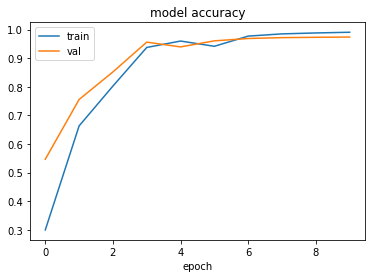

In [20]:
plt.plot(model_fit.history["acc"])
plt.plot(model_fit.history['val_acc'])

plt.title("model accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "best")
plt.show()

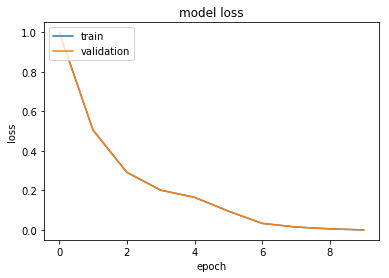

In [21]:
loss = np.asarray(model_fit.history["loss"])
lossarray = (loss-loss.min())/(loss.max()-loss.min())

lossv = np.asarray(model_fit.history["val_loss"])
lossvarray = (loss-loss.min())/(loss.max()-loss.min())

plt.plot(lossarray)
plt.plot(lossvarray)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
model_json = model.to_json()
open('model.json', 'w').write(model_json)
model.save_weights('model_weights.h5')

In [24]:
from keras.models import model_from_json
model = model_from_json(open('model.json').read())
model.load_weights('model_weights.h5')
from keras import optimizers
Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'categorical_crossentropy', 
              optimizer =Adam,
              metrics = ["accuracy"])

In [25]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_test[0].shape

(28, 28)

In [27]:
model.predict_classes(x_test[0].reshape(1,784))

array([7], dtype=int64)

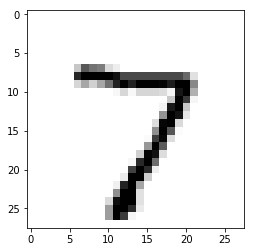

In [28]:
plt.imshow(x_test[0], cmap='Greys')